# Flare 2023/06/09

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

E:\solar flares/data/2017-09-06\use_nessi.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:948: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:1688: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1688: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1911: SyntaxWarning: invalid escape sequence '\s'
  return "E:\solar

In [13]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_3950_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T14_21_14_im.fits"
ttff = timeframe_to_filename_fits



In [15]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Thu Jun 29 11:56:44 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2005 / Number of positions along axis 1               
NAXIS2  =                 2110 / Number of positions along axis 2               
NAXIS3  =                   29 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                  124 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [16]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[5].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaK.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001A880C00EC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F1D00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F36B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F0F80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F1520>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F3B00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A8EC528EF0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC529280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F6B70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F60F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F4110>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F51F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5F4860>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC5FC6B0>, <astropy.io.fits.hdu.ta

[[[[[1.89764702e-08]]

   [[1.90534806e-08]]

   [[1.94802166e-08]]

   ...

   [[1.84965181e-08]]

   [[1.84104891e-08]]

   [[8.60596572e-08]]]]



 [[[[1.79759354e-08]]

   [[1.77765695e-08]]

   [[1.82062241e-08]]

   ...

   [[1.76368076e-08]]

   [[1.77467641e-08]]

   [[7.58741976e-08]]]]



 [[[[1.88056859e-08]]

   [[1.86141769e-08]]

   [[1.92133740e-08]]

   ...

   [[1.80193478e-08]]

   [[1.79091764e-08]]

   [[7.96645097e-08]]]]



 ...



 [[[[1.35776341e-08]]

   [[1.35851934e-08]]

   [[1.41347218e-08]]

   ...

   [[1.42543195e-08]]

   [[1.32171323e-08]]

   [[6.19297538e-08]]]]



 [[[[1.31065470e-08]]

   [[1.32687754e-08]]

   [[1.38547831e-08]]

   ...

   [[1.39260736e-08]]

   [[1.30783100e-08]]

   [[6.03363191e-08]]]]



 [[[[1.29483437e-08]]

   [[1.29637083e-08]]

   [[1.34750868e-08]]

   ...

   [[1.35698741e-08]]

   [[1.28681679e-08]]

   [[5.86020334e-08]]]]]

 next hdl number 29 : <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A8EC78F260>
(1

In [17]:
pos[0][0][:,:,0,0,2][0]

array([396.64692773, 396.67192773, 396.69692773, 396.72192773,
       396.74692773, 396.75692773, 396.76692773, 396.77692773,
       396.78692773, 396.79692773, 396.80692773, 396.81692773,
       396.82692773, 396.83692773, 396.84692773, 396.85692773,
       396.86692773, 396.87692773, 396.88692773, 396.89692773,
       396.90692773, 396.91692773, 396.92692773, 396.93692773,
       396.94692773, 396.97192773, 396.99692773, 397.02192773,
       399.9       ], dtype='>f8')

In [18]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('11:28:01',
 array(['DATE: 2023-06-17T11:27:45', 'DATE: 2023-06-17T11:27:53',
        'DATE: 2023-06-17T11:28:01', 'DATE: 2023-06-17T11:28:09',
        'DATE: 2023-06-17T11:28:17', 'DATE: 2023-06-17T11:28:24',
        'DATE: 2023-06-17T11:28:32', 'DATE: 2023-06-17T11:28:40',
        'DATE: 2023-06-17T11:28:49', 'DATE: 2023-06-29T11:24:39',
        'DATE: 2023-06-17T11:29:04', 'DATE: 2023-06-17T11:29:12',
        'DATE: 2023-06-17T11:29:20', 'DATE: 2023-06-17T11:29:29',
        'DATE: 2023-06-17T11:29:36', 'DATE: 2023-06-17T11:29:44',
        'DATE: 2023-06-17T11:29:51', 'DATE: 2023-06-17T11:29:59',
        'DATE: 2023-06-17T11:30:07', 'DATE: 2023-06-19T14:52:37',
        'DATE: 2023-06-17T11:30:22', 'DATE: 2023-06-19T15:23:50',
        'DATE: 2023-06-19T14:58:52', 'DATE: 2023-06-17T11:30:46',
        'DATE: 2023-06-17T11:30:54', 'DATE: 2023-06-17T11:31:02',
        'DATE: 2023-06-19T15:05:06', 'DATE: 2023-06-17T11:31:17',
        'DATE: 2023-06-17T11:31:25', 'DATE: 2023-06-17T11:31:32

In [19]:
time_list = [t[17:] for t in tlist3]
time_list

['11:27:45',
 '11:27:53',
 '11:28:01',
 '11:28:09',
 '11:28:17',
 '11:28:24',
 '11:28:32',
 '11:28:40',
 '11:28:49',
 '11:24:39',
 '11:29:04',
 '11:29:12',
 '11:29:20',
 '11:29:29',
 '11:29:36',
 '11:29:44',
 '11:29:51',
 '11:29:59',
 '11:30:07',
 '14:52:37',
 '11:30:22',
 '15:23:50',
 '14:58:52',
 '11:30:46',
 '11:30:54',
 '11:31:02',
 '15:05:06',
 '11:31:17',
 '11:31:25',
 '11:31:32',
 '11:31:40',
 '11:31:48',
 '11:31:55',
 '19:12:40',
 '19:17:54',
 '11:32:18',
 '11:11:21',
 '11:32:33',
 '11:32:42',
 '11:32:49',
 '11:32:57',
 '11:33:05',
 '11:33:12',
 '11:33:19',
 '11:33:27',
 '11:33:35',
 '11:33:43',
 '11:33:51',
 '11:33:59',
 '11:34:06',
 '15:17:38',
 '11:34:22',
 '11:34:29',
 '11:34:37',
 '11:34:45',
 '11:34:53',
 '11:35:01',
 '11:35:09',
 '11:35:17',
 '11:35:24',
 '11:35:33',
 '11:35:40',
 '11:35:48',
 '11:35:55',
 '11:36:03',
 '11:36:13',
 '11:36:21',
 '11:36:28',
 '11:36:36',
 '11:36:44',
 '11:36:52',
 '11:36:59',
 '11:37:07',
 '11:37:14',
 '11:37:22',
 '11:37:30',
 '11:37:38',

In [20]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [21]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (29, 2110, 2005)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:/solar flares/data/2023-06-09/fits/nb_3950_2023-06-09T17_01_03_17_01_03=0-123_mixed_corrected_export2023-07-24T14_21_14_im.fits
s=(29, 2110, 2005)
the shape of the data is (124, '??', 29, 2110, 2005)
the wavelengths are self._wavel = array([3966.46927734, 3966.71927734, 3966.96927734, 3967.21927734,
       3967.46927734, 3967.56927734, 3967.66927734, 3967.76927734,
       3967.86927734, 3967.96927734, 3968.06927734, 3968.16927734,
       3968.26927734, 3968.36927734, 3968.46927734, 3968.56927734,
       3968.66927734, 3968.76927734, 3968.86927734, 3968.96927734,
       3969.06927734, 3969.16927734, 3969.26927734, 3969.36927734,
       3969.46927734, 3969.71927734, 3969.96927734, 3970.21927734,
       3999.        ])
Boundary
Blue=Outside, yellow=Inside


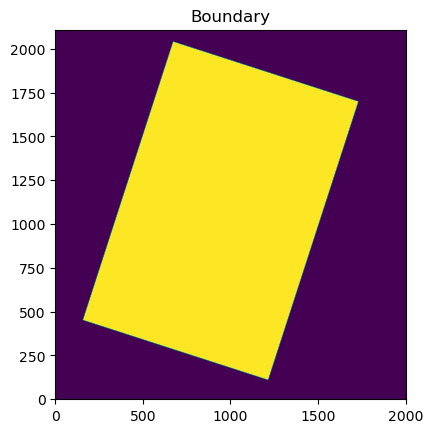

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaK = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaK.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='CaK23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# CaK.datacube
# np.shape(CaK.datacube), CaK.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaK.boundary


In [23]:
# CaK.calculate__FOV_spect_over_time()

In [24]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaK.shape=}')

the mean cadence is 7.658536585365909 seconds for this line!
CaK.shape=(124, '??', 29, 2110, 2005)


The guessed filters are [[4.333333333333333, 3.625], [14.0, 3.625], [23.666666666666668, 3.625]]


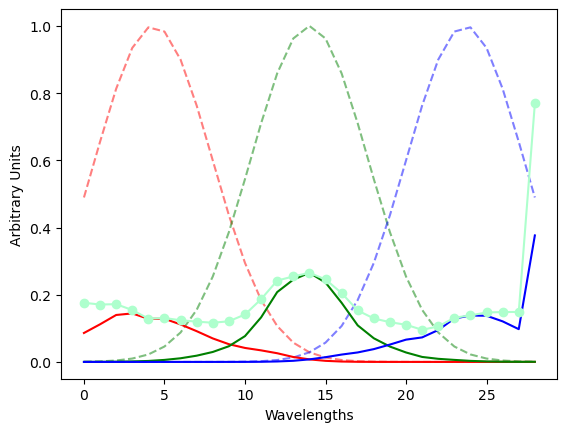

In [25]:
# %matplotlib inline
CaK.update_filters(None)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

the number of frames is 124
frame number 0 at time 11:27:45


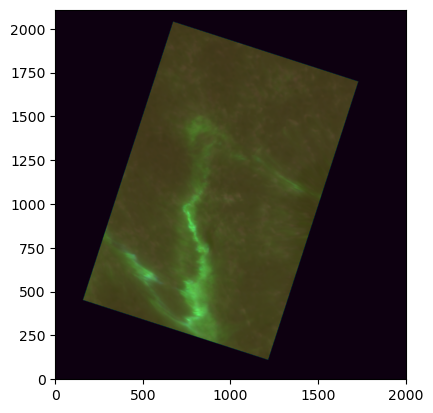

(2110, 2005, 3)
frame number 19 at time 14:52:37


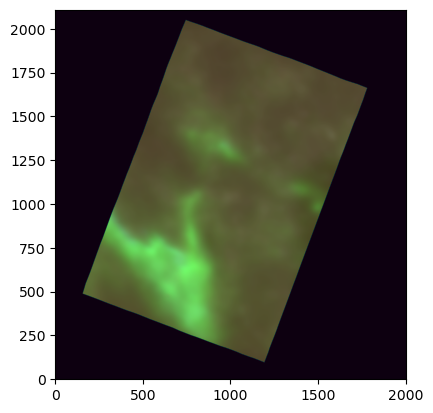

(2110, 2005, 3)
frame number 38 at time 11:32:42


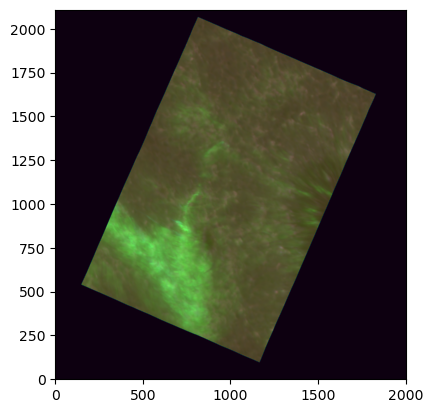

(2110, 2005, 3)
frame number 57 at time 11:35:09


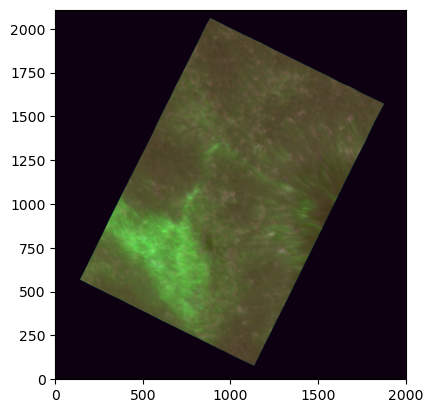

(2110, 2005, 3)
frame number 76 at time 11:37:38


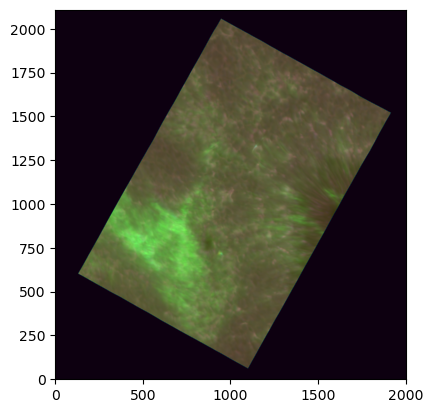

(2110, 2005, 3)
frame number 95 at time 11:39:59


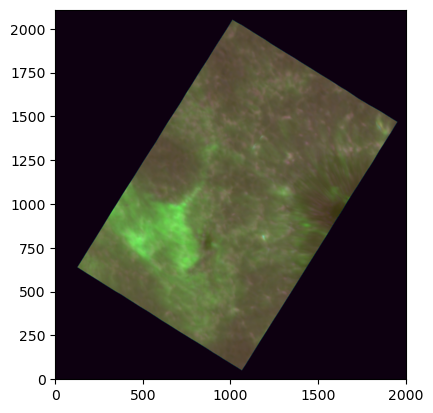

(2110, 2005, 3)
frame number 114 at time 11:42:21


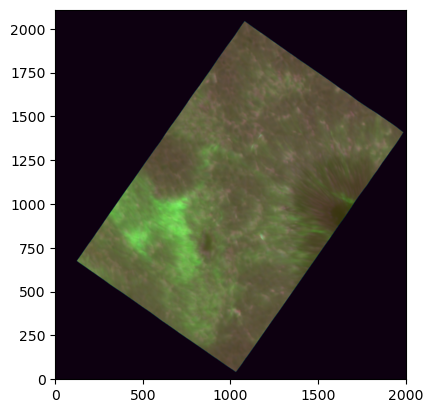

(2110, 2005, 3)


In [26]:
# %matplotlib widget
print(f'the number of frames is {CaK._number_of_frames}')
for frame in range(0 ,CaK._number_of_frames, 19):
    # frame=0
    CaK.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {CaK._time[frame]}')
    plt.imshow(CaK.current_ccp, origin='lower')
    plt.imshow(CaK.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    # plt.imshow(CaK.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(CaK.current_ccp))#,np.shape(CaK.boundary))

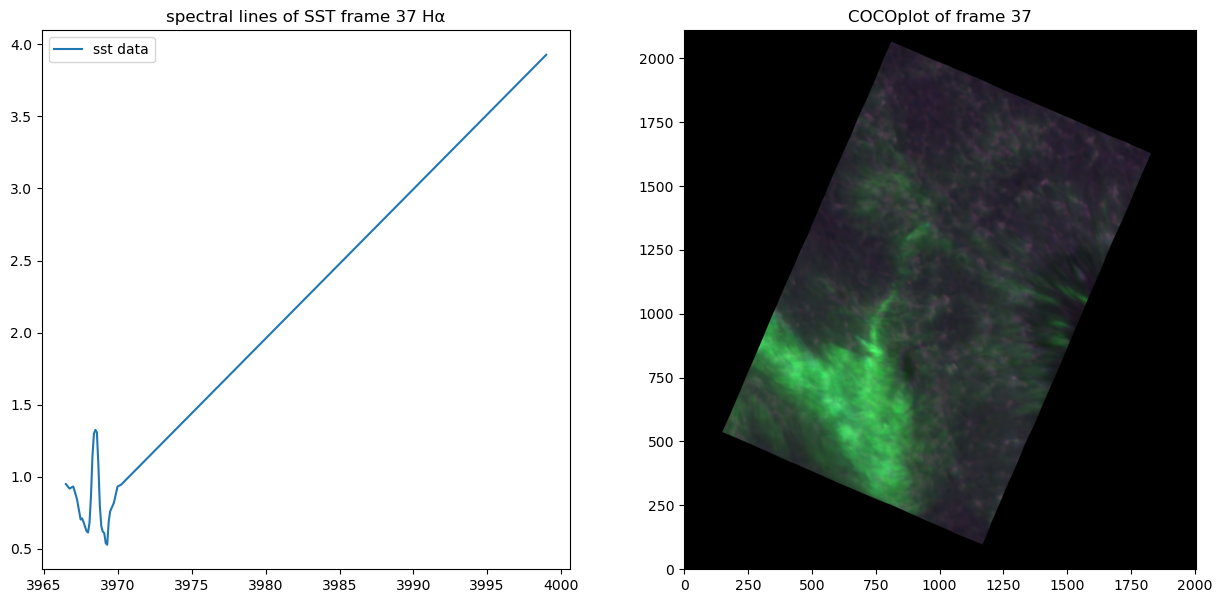

In [27]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 37
CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


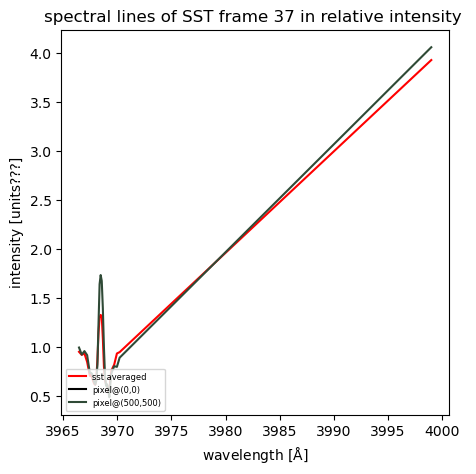

In [28]:
CaK.current_ccp[0:30:10,0:60:20,:]
CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

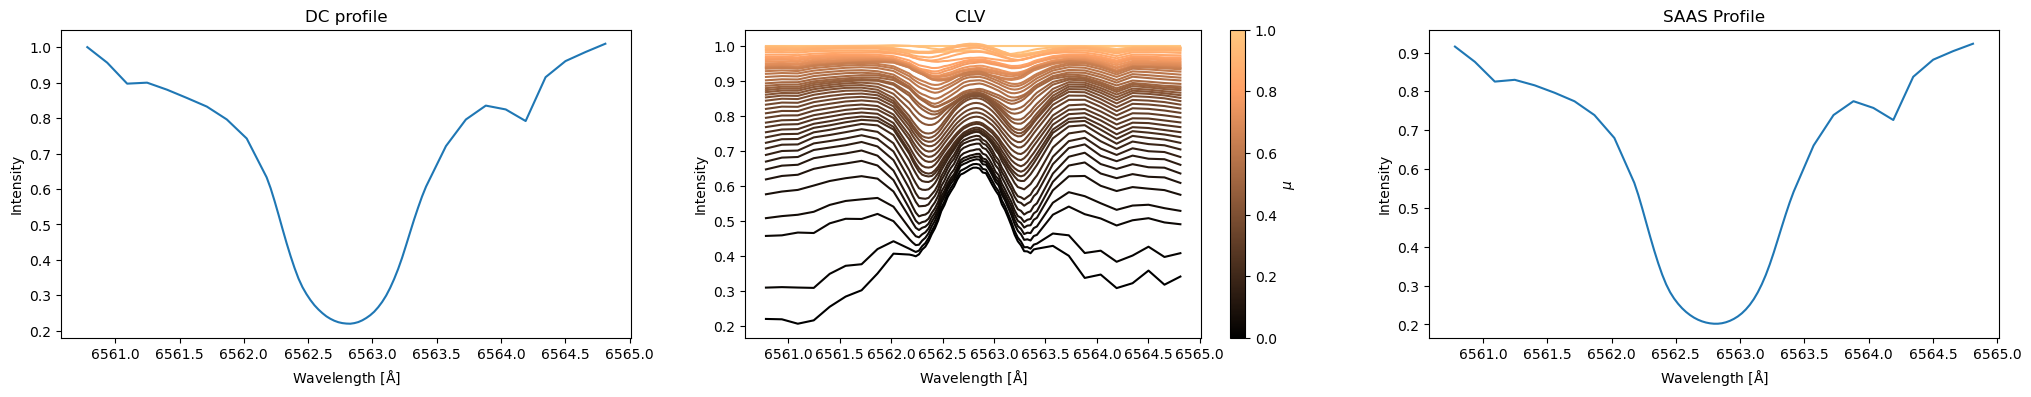

6562.797056366136 6562.797056366135


In [29]:
reload(un)
theor_CaK = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [30]:
CaK.shape

(124, '??', 29, 2110, 2005)

In [31]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaK.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Thu Jun 29 11:56:44 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2005 / Number of positions along axis 1              
 NAXIS2  =                 2110 / Number of positions along axis 2              
 NAXIS3  =                   29 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  124 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [32]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [33]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[29,0]

(array([[[[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11845205]],
 
          [[-649.24380045, -311.18735205],
           [-573.29220045, -311.18735205]]],
 
 
         [[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11845205]],
 
          [[-649.24380045, -311.18735205],
           [-573.29220045, -311.18735205]]],
 
 
         [[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11845205]],
 
          [[-649.24380045, -311.18735205],
           [-573.29220045, -311.18735205]]],
 
 
         ...,
 
 
         [[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11845205]],
 
          [[-649.24380045, -311.18735205],
           [-573.29220045, -311.18735205]]],
 
 
         [[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11845205]],
 
          [[-649.24380045, -311.18735205],
           [-573.29220045, -311.18735205]]],
 
 
         [[[-649.24380045, -391.11845205],
           [-573.29220045, -391.11

width = 133.7375
[-659.51989285, -537.11189285, -413.92528588, -291.95728588]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.29906553196388264 for timeframe 10
Coundourplot succesfully saved.


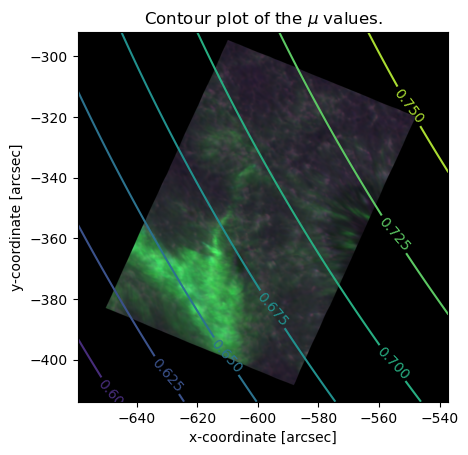

In [ ]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaK.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)



# fxp = [-659.51989285, -537.11189285 ]
# fyp = [-413.92528588, -291.95728588 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaK.shape[4])
y = np.linspace(fyp[0], fyp[1], CaK.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaK, save=True, save_name=CaK.name_of_line, timeFrame=10)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)


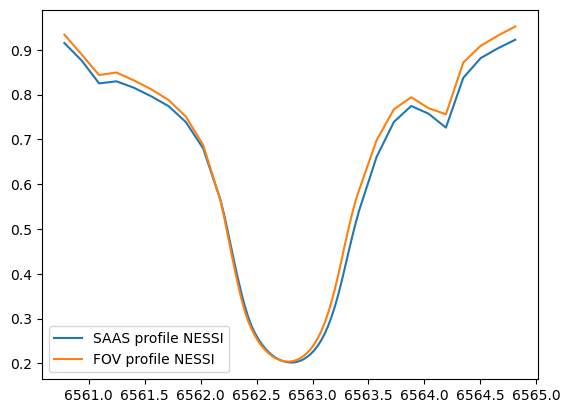

In [35]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [36]:
frame, CaK.shape

(37, (124, '??', 29, 2110, 2005))

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2844\3554955921.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


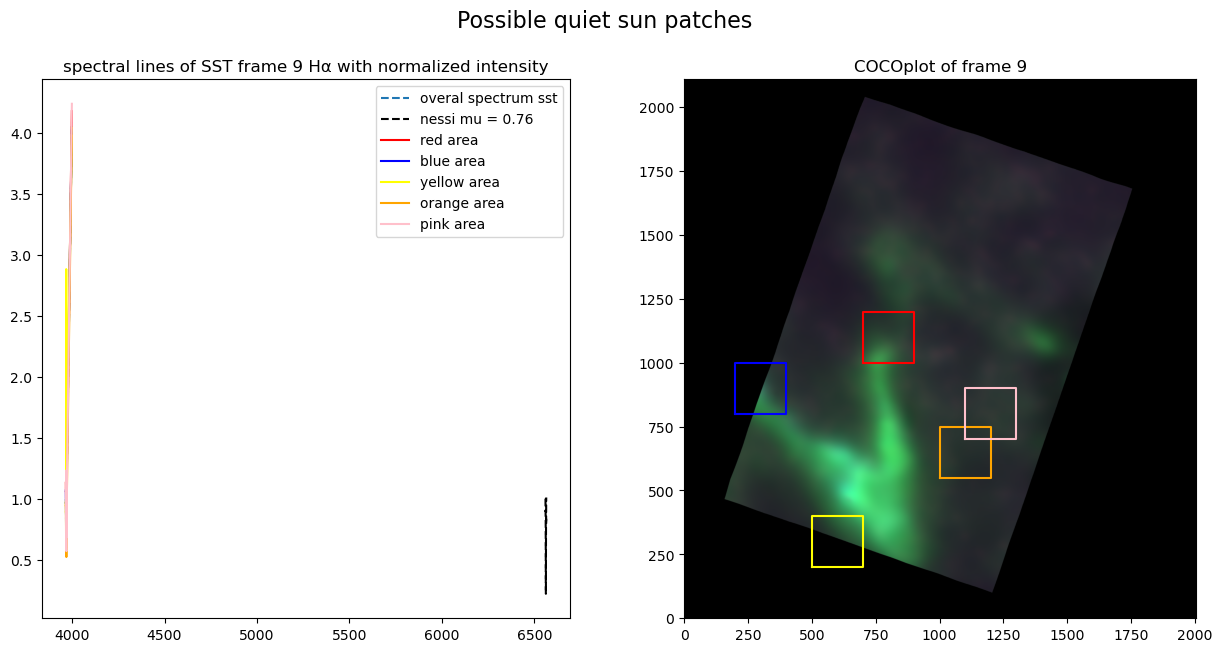

In [37]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc*theor_CaK.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [38]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


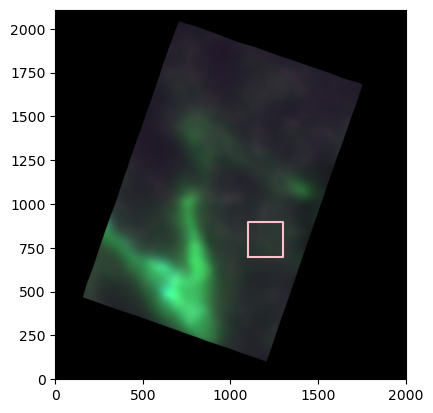

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

In [39]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaK.quiet_sun

The quiet sun is pick at x (-586.2522301753492, -367.68848360403985) with average              mu 0.692801643499094


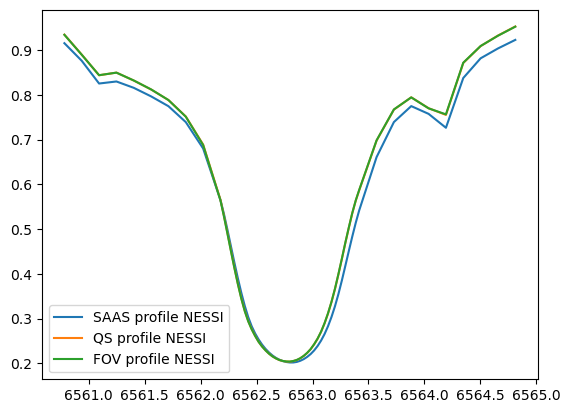

In [40]:
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim)


[3966.46927734 3966.71927734 3966.96927734 3967.21927734 3967.46927734
 3967.56927734 3967.66927734 3967.76927734 3967.86927734 3967.96927734
 3968.06927734 3968.16927734 3968.26927734 3968.36927734 3968.46927734
 3968.56927734 3968.66927734 3968.76927734 3968.86927734 3968.96927734
 3969.06927734 3969.16927734 3969.26927734 3969.36927734 3969.46927734
 3969.71927734 3969.96927734 3970.21927734 3999.        ] [1.08700788 1.04148495 1.05200505 0.93898964 0.78059173 0.79110444
 0.75224251 0.71569312 0.67974919 0.68084246 0.77762276 1.01084256
 1.16530323 1.0569948  1.09005308 1.23119521 1.10241342 0.81383395
 0.70215094 0.6771754  0.65331507 0.57004333 0.60585749 0.78858304
 0.83655006 0.87097037 0.88408142 0.92189616 4.23801947] [748.65706448 748.58501046 748.51295644 748.44090242 748.36884839
 748.34002678 748.31120517 748.28238356 748.25356196 748.22474035
 748.19591874 748.16709713 748.13827552 748.10945391 748.0806323
 748.05181069 748.02298908 747.99416747 747.96534586 747.93652425

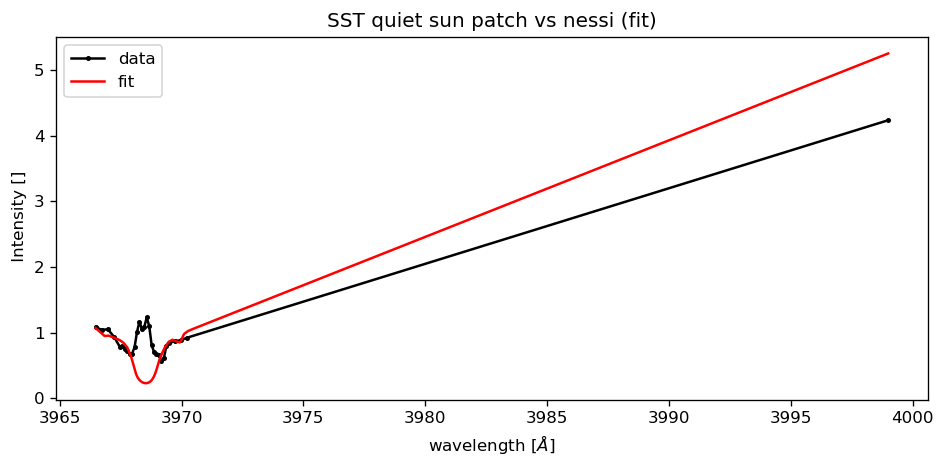

de p-waarde is  4.869052494220137e-54 
Chi^2 reduced= 330.8632699311348 
aantal vrijheidgraden= 27 
chi^2= 8933.30828814064
we behouden de fit tot op een betrouwbaarheidsniveau van  4.869052494220137e-54 
Oftewel verwerp als p-waarde <lpha-niveau 


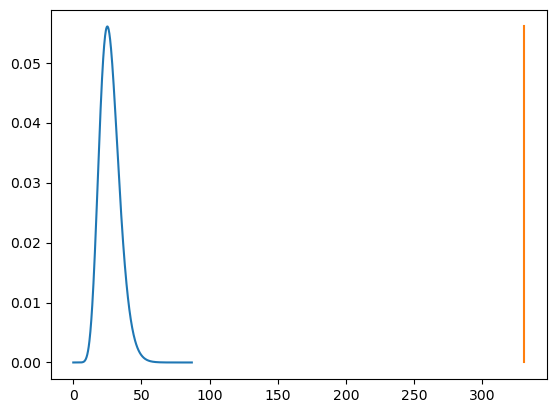

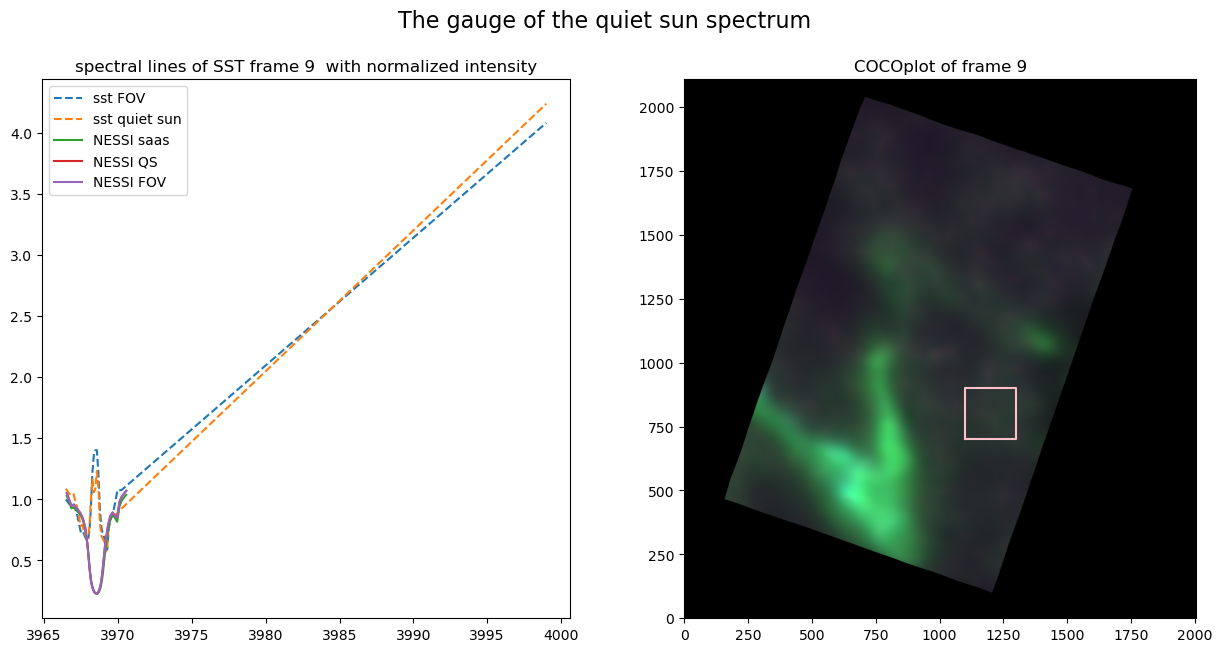

In [41]:
reload(un)
un.fit_qs_to_NESSI(theor_CaK, CaK)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [ ]:
sst_data = CaK
CaK.shape

(124, '??', 29, 2110, 2005)

: 

In [ ]:
CaK.calculate__FOV_spect_over_time()

In total 124 frames.
Now calculating frame:
47

In [ ]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [269] at time ['t=12:57:40 UT'].
The areafactor for THIS flare is 0.0018655045742858262 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 149.92%.


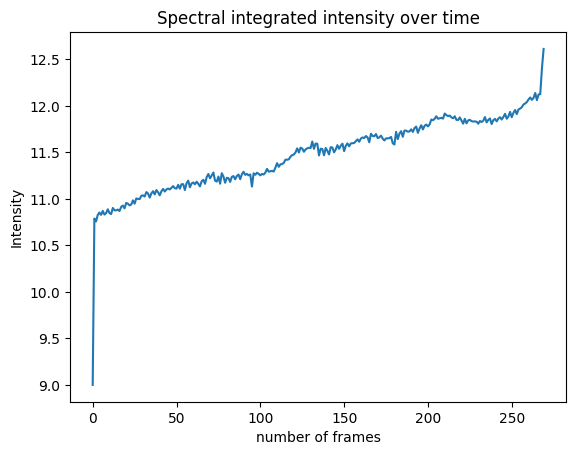

In [ ]:
reload(un)
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

frame: 0, 12:39:53, total number of frames: 270 


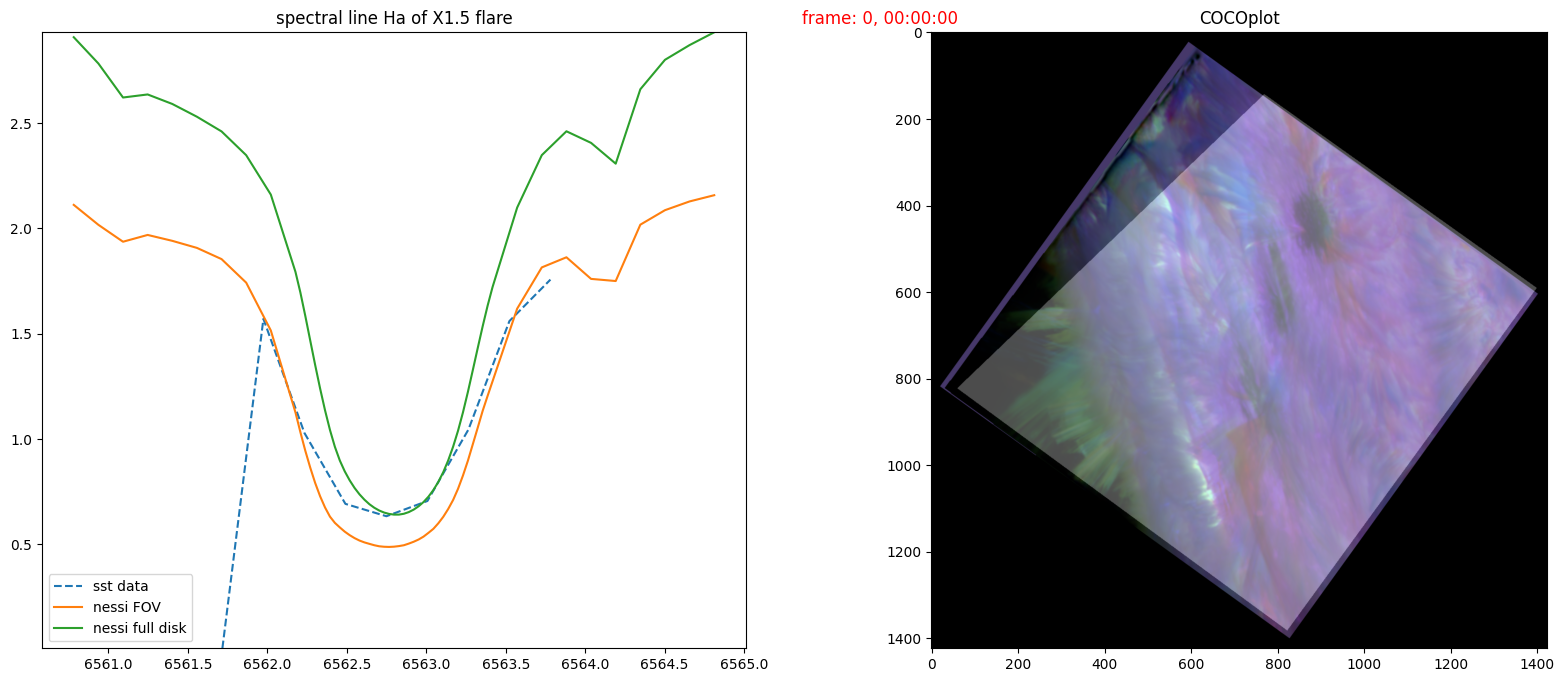

0 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264 266 

In [ ]:
# fill in here all arguments
theor_line = theor_line
sst_data = CaK
name_of_flare = 
name_of_line = "CaK"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=True)

In [ ]:
# exit()